In [42]:
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPool2D,Input,Flatten,Dense

## Load the dataset

In [ ]:
dataset_dir = 'E:/Data/script/Datasets/quick_drow_dataset'
files = os.listdir(dataset_dir)
max_size_per_cl = 1500
drow_cl = []

# Size evaluation
size = 0
for file in files:
    drows = np.load(os.path.join(dataset_dir,file))
    drows = drows[:max_size_per_cl]
    size = size + drows.shape[0]

images = np.zeros((size,28,28))
target = np.zeros((size,))




full_numpy_bitmap_airplane.npy
full_numpy_bitmap_apple.npy
full_numpy_bitmap_book.npy
full_numpy_bitmap_chair.npy
full_numpy_bitmap_dog.npy
full_numpy_bitmap_eye.npy
full_numpy_bitmap_face.npy


In [7]:
it=0
t=0
for file in files :
    drow_cl.append(file.replace('full_numpy_bitmap_',"").replace('.npy',''))
    drows = np.load(os.path.join(dataset_dir,file))
    drows = drows[:max_size_per_cl]
    
    images[it:it+drows.shape[0]] = np.invert(drows.reshape(-1,28,28))
    target[it:it+drows.shape[0]] = t

    it += drows.shape[0]
    t += 1

# Shufle dataset :melanger

index = np.arange(size)
np.random.shuffle(index)
images = images[index]
target = target[index]

image_train,image_test ,target_train ,target_test = train_test_split(images,target ,test_size=0.33,random_state=42)




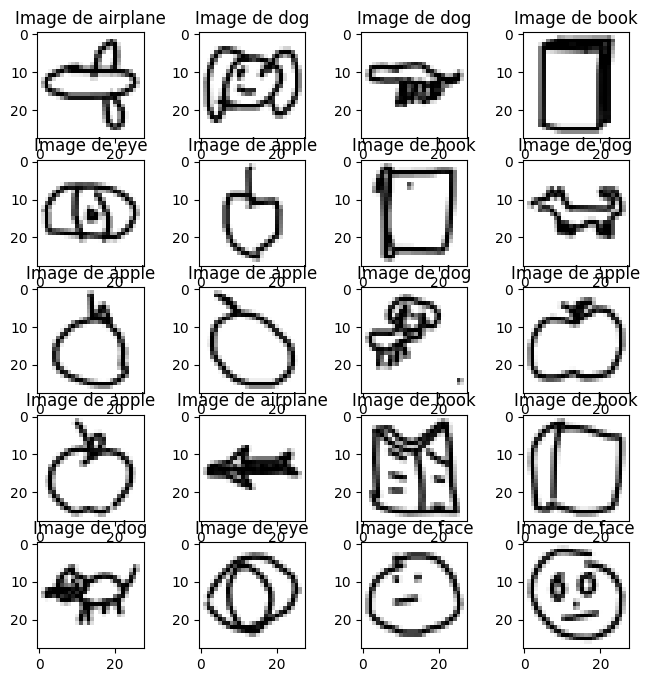

In [13]:
h=10
w=10
fig = plt.figure(figsize=(8,8))
column = 4
row = 5
for i in range(1,column*row + 1):
    index = np.random.randint(len(image_train))
    img = image_train[index]
    fig.add_subplot(row,column ,i)
    plt.title(f'Image de {drow_cl[int(target_train[index])]}')
    plt.imshow(img ,cmap='gray')

plt.show()

## Normalisation de donnée

In [25]:
image_train.max()

np.float64(255.0)

In [28]:
scale = StandardScaler()
x_train_scale = scale.fit_transform(image_train.reshape(-1,28*28))
x_test_scale = scale.transform(image_test.reshape(-1,28*28))

x_train_scale = x_train_scale.reshape(-1,28,28,1)
x_test_scale = x_test_scale.reshape(-1,28,28,1)

In [29]:
x_test_scale.shape

(3465, 28, 28, 1)

In [34]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_scale,target_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test_scale,target_test))

In [37]:
for item,target in train_data:
    print(item.shape,target)
    break

(28, 28, 1) tf.Tensor(2.0, shape=(), dtype=float64)


## Implementation de CNN

In [43]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3) ,activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3) ,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [44]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,399 (950.78 KB)

 Trainable params: 243,399 (950.78 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
history = model.fit(x_train_scale,target_train ,epochs=10,batch_size=32)

Epoch 1/10


220/220 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.8009 - loss: 0.6029
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9025 - loss: 0.3077
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9247 - loss: 0.2306
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.9473 - loss: 0.1571
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9652 - loss: 0.1105
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9768 - loss: 0.0680
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9864 - loss: 0.0454
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9903 - loss: 0.0330
Epoch 9/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9922 - loss: 0.0252
Epoch 10/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9950 - loss: 0.0168


In [56]:
loss = history.history['loss']
accuracy = history.history['accuracy']

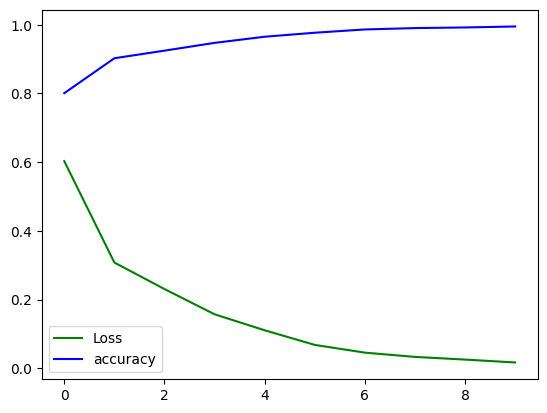

In [57]:
plt.plot(loss ,color='green' ,label= "Loss")
plt.plot(accuracy,color='blue',label='accuracy')
plt.legend()
plt.show()

In [58]:
prediction = model.predict(x_test_scale)

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [60]:
pred = []
for i in range(len(prediction)):
    pred.append(int(np.argmax(prediction[i])))


true = 0
false = 0

for i,j in zip(target_test,pred):
    if i == j:
        true = true + 1
    else:
        false = false + 1

print(f" On trouve {true} vraies et {false} fausse pour notre teste et de score {true/(true+false)}")

 On trouve 3173 vraies et 292 fausse pour notre teste et de score 0.9157287157287157
